#### Importing all required libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import plotly.graph_objects as go
import plotly.io as pio 
import plotly.express as px
from plotly.subplots import make_subplots

#### Loading the raw data into respective Data Frames from excel 

In [2]:
raw_1997_a_m = pd.read_excel('Resources/State_A_M_1997.xlsx')
raw_1997_n_z = pd.read_excel('Resources/State_N_Z_1997_data.xlsx')
raw_2007_a_m = pd.read_excel('Resources/State_A_M_2007.xlsx')
raw_2007_n_z = pd.read_excel('Resources/State_N_Z_2007.xlsx')
raw_2017_a_m = pd.read_excel('Resources/YRSS_2017__State_A_M.xlsx')
raw_2017_n_z = pd.read_excel('Resources/YRSS_2017_State_N_Z.xlsx')

In [3]:
raw_1997_a_m.describe()
raw_1997_n_z.describe()
raw_2007_a_m.describe()
raw_2007_n_z.describe()
raw_2017_a_m.describe()
raw_2017_n_z.describe()

,sitetypenum,survyear,weight,stratum,PSU,record,age,sex,grade,race4,...,qwenthungry,qmusclestrength,qsunscreenuse,qindoortanning,qsunburn,qconcentrating,qcurrentasthma,qwheresleep,qspeakenglish,qtransgender
count,52198.0,52198.0,52198.000000,52198.000000,52198.000000,5.219800e+04,51966.000000,51630.000000,51456.000000,50543.000000,...,18893.000000,1370.000000,3986.000000,8442.000000,2118.00000,0.0,6022.000000,23568.000000,0.0,4075.000000
mean,2.0,14.0,70.870995,22.768918,3.464252,1.468470e+06,4.857022,1.490819,2.408504,1.908889,...,1.439951,3.880292,2.223281,1.188936,2.81728,NaN,1.730488,1.119102,NaN,1.126135
std,0.0,0.0,87.881336,18.998994,4.848362,2.547539e+04,1.248909,0.499921,1.092169,1.122643,...,0.826242,2.494460,1.135409,0.717844,1.67144,NaN,1.007494,0.690382,NaN,0.532490
min,2.0,14.0,1.000000,1.000000,1.000000,1.433331e+06,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,NaN,1.000000,1.000000,NaN,1.000000
25%,2.0,14.0,8.203100,8.000000,1.000000,1.446380e+06,4.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,NaN,1.000000,1.000000,NaN,1.000000
50%,2.0,14.0,37.377200,16.000000,2.000000,1.459430e+06,5.000000,1.000000,2.000000,1.000000,...,1.000000,4.000000,2.000000,1.000000,3.00000,NaN,1.000000,1.000000,NaN,1.000000
75%,2.0,14.0,108.190350,36.000000,2.000000,1.494247e+06,6.000000,2.000000,3.000000,3.000000,...,2.000000,6.000000,3.000000,1.000000,4.00000,NaN,3.000000,1.000000,NaN,1.000000
max,2.0,14.0,845.472800,69.000000,43.000000,1.509748e+06,7.000000,2.000000,4.000000,4.000000,...,5.000000,8.000000,5.000000,6.000000,6.00000,NaN,4.000000,7.000000,NaN,4.000000


#### Data Cleaning - replacing NA with 0

In [4]:
raw_1997_a_m.fillna(0)
raw_1997_n_z.fillna(0)
raw_2007_a_m.fillna(0)
raw_2007_n_z.fillna(0)
raw_2017_a_m.fillna(0)
raw_2017_n_z.fillna(0)

,sitecode,sitename,sitetype,sitetypenum,survyear,weight,stratum,PSU,record,age,...,qwenthungry,qmusclestrength,qsunscreenuse,qindoortanning,qsunburn,qconcentrating,qcurrentasthma,qwheresleep,qspeakenglish,qtransgender
0,NC,North Carolina (NC),State,2,14,92.0171,4,2,1433331,0.0,...,1.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0
1,NC,North Carolina (NC),State,2,14,189.1352,10,2,1433332,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,NC,North Carolina (NC),State,2,14,39.7448,6,1,1433333,1.0,...,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NC,North Carolina (NC),State,2,14,102.7125,16,1,1433334,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,4.0,4.0,0.0,0.0
4,NC,North Carolina (NC),State,2,14,137.7275,3,2,1433335,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52193,WV,West Virginia (WV),State,2,14,120.8731,6,2,1509744,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52194,WV,West Virginia (WV),State,2,14,64.4657,5,1,1509745,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52195,WV,West Virginia (WV),State,2,14,16.8292,5,1,1509746,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52196,WV,West Virginia (WV),State,2,14,117.3226,11,1,1509747,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Combining Data for all states for each year

In [5]:
Final_2017_df = raw_2017_a_m.append(raw_2017_n_z, ignore_index = True) 
len(Final_2017_df.columns)

150

In [6]:
Final_2007_df = raw_2007_a_m.append(raw_2007_n_z, ignore_index = True) 
len(Final_2007_df.columns)

150

In [7]:
Final_1997_df = raw_1997_a_m.append(raw_1997_n_z, ignore_index = True) 
len(Final_1997_df.columns)

150

In [8]:
Final_2017_df.fillna(0)
Final_2007_df.fillna(0)
Final_1997_df.fillna(0)

,sitecode,sitename,sitetype,sitetypenum,year,survyear,weight,stratum,PSU,record,...,qwenthungry,qmusclestrength,qsunscreenuse,qindoortanning,qsunburn,qconcentrating,qcurrentasthma,qwheresleep,qspeakenglish,qtransgender
0,AL,Alabama (AL),State,2,1997,4,48.6943,23,2,187083,...,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AL,Alabama (AL),State,2,1997,4,66.3539,8,2,187084,...,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AL,Alabama (AL),State,2,1997,4,82.4886,4,2,187085,...,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AL,Alabama (AL),State,2,1997,4,61.6591,8,2,187086,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AL,Alabama (AL),State,2,1997,4,36.0342,17,2,187087,...,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47461,WY,Wyoming (WY),State,2,1997,4,16.9679,9,4,247332,...,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47462,WY,Wyoming (WY),State,2,1997,4,25.7929,25,2,247333,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47463,WY,Wyoming (WY),State,2,1997,4,25.7929,25,2,247334,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47464,WY,Wyoming (WY),State,2,1997,4,16.9679,9,5,247335,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Select questions for Analysis

In [9]:
Data_2017 = Final_2017_df[["sitecode", "year", "weight","bmi", "age", "sex", "grade",
                          "race4", "race7","q30", "q31","q32", "q33", "q37", "q38", "q39",
                           "q34", "q35", "q68", "q79", "q80", "q83"]]
Data_2017.fillna(0)
Data_2017 = Data_2017[~Data_2017['bmi'].isnull()]
Data_2017

,sitecode,year,weight,bmi,age,sex,grade,race4,race7,q30,...,q33,q37,q38,q39,q34,q35,q68,q79,q80,q83
2,AK,2017.0,15.7927,182.405507,3.0,NaN,NaN,3.0,4.0,1.0,...,7.0,7.0,7.0,NaN,1.0,7.0,NaN,1.0,7.0,1.0
3,AK,2017.0,15.3101,19.285006,3.0,NaN,1.0,1.0,6.0,2.0,...,1.0,1.0,1.0,NaN,2.0,1.0,NaN,6.0,2.0,1.0
4,AK,2017.0,14.5619,25.160156,6.0,NaN,2.0,4.0,7.0,1.0,...,1.0,1.0,1.0,NaN,1.0,NaN,NaN,2.0,2.0,1.0
5,AK,2017.0,32.2413,22.796202,NaN,2.0,4.0,4.0,1.0,1.0,...,1.0,7.0,1.0,NaN,1.0,1.0,NaN,8.0,7.0,2.0
6,AK,2017.0,36.0227,16.964207,NaN,2.0,4.0,4.0,7.0,2.0,...,1.0,1.0,1.0,NaN,2.0,1.0,NaN,3.0,6.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107659,WV,NaN,120.8731,21.261719,7.0,1.0,4.0,1.0,6.0,2.0,...,1.0,1.0,1.0,1.0,2.0,1.0,3.0,5.0,4.0,2.0
107660,WV,NaN,64.4657,23.699592,7.0,1.0,4.0,1.0,6.0,2.0,...,1.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,4.0,2.0
107661,WV,NaN,16.8292,20.964444,7.0,1.0,4.0,3.0,4.0,2.0,...,1.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,4.0,1.0
107662,WV,NaN,117.3226,18.501561,7.0,1.0,4.0,1.0,6.0,2.0,...,1.0,1.0,1.0,1.0,2.0,1.0,2.0,8.0,3.0,2.0


In [10]:
Data_2007 = Final_2007_df[["sitecode", "year", "weight", "bmi", "age", "sex", "grade",
                          "race4", "race7", "q28", "q29","q30","q31","q35",
                           "q37", "q38", "q39", "q72","q78"]]
Data_2007.fillna(0)
Data_2007 = Data_2007[~Data_2007['bmi'].isnull()]
Data_2007

,sitecode,year,weight,bmi,age,sex,grade,race4,race7,q28,q29,q30,q31,q35,q37,q38,q39,q72,q78
0,AK,2007,27.7943,19.598765,NaN,NaN,3.0,1.0,6.0,2.0,3.0,1.0,NaN,NaN,NaN,1.0,NaN,2.0,NaN
1,AK,2007,24.7029,0.543413,1.0,NaN,NaN,3.0,4.0,5.0,2.0,1.0,NaN,NaN,NaN,7.0,NaN,1.0,NaN
2,AK,2007,23.6404,18.961450,3.0,NaN,NaN,1.0,6.0,1.0,1.0,2.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN
3,AK,2007,17.7303,18.944836,4.0,NaN,1.0,1.0,6.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,2.0,NaN
4,AK,2007,27.5419,20.317119,4.0,NaN,1.0,1.0,6.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38449,ND,2007,5.3395,45.080247,3.0,1.0,1.0,2.0,3.0,1.0,NaN,1.0,NaN,NaN,NaN,2.0,NaN,2.0,NaN
38450,ND,2007,15.4461,28.351562,3.0,1.0,1.0,1.0,6.0,1.0,NaN,2.0,NaN,NaN,NaN,1.0,NaN,5.0,NaN
38451,ND,2007,23.4394,18.962585,3.0,1.0,1.0,1.0,6.0,1.0,NaN,2.0,NaN,NaN,NaN,1.0,NaN,2.0,NaN
38452,ND,2007,6.2294,23.049418,3.0,1.0,1.0,3.0,4.0,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,3.0,NaN


In [11]:
Data_1997 = Final_1997_df[["sitecode", "year", "weight", "bmi", "age", "sex", "grade",
                          "race4", "race7","q26", "q27", "q28", "q29", "q64", "q71"]]
Data_1997.fillna(0)


,sitecode,year,weight,bmi,age,sex,grade,race4,race7,q26,q27,q28,q29,q64,q71
0,AL,1997,48.6943,0.0,1.0,0.0,2.0,2.0,3.0,2.0,2.0,0.0,0.0,0.0,0.0
1,AL,1997,66.3539,0.0,3.0,0.0,0.0,2.0,3.0,2.0,2.0,1.0,1.0,0.0,0.0
2,AL,1997,82.4886,0.0,4.0,0.0,3.0,4.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0
3,AL,1997,61.6591,0.0,4.0,0.0,0.0,2.0,3.0,1.0,1.0,1.0,1.0,0.0,0.0
4,AL,1997,36.0342,0.0,4.0,0.0,0.0,1.0,6.0,2.0,2.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47461,WY,1997,16.9679,0.0,7.0,1.0,4.0,1.0,6.0,2.0,2.0,1.0,1.0,1.0,0.0
47462,WY,1997,25.7929,0.0,7.0,1.0,4.0,1.0,6.0,2.0,2.0,1.0,1.0,2.0,0.0
47463,WY,1997,25.7929,0.0,7.0,1.0,4.0,1.0,6.0,1.0,1.0,2.0,3.0,2.0,0.0
47464,WY,1997,16.9679,0.0,7.0,1.0,4.0,1.0,6.0,2.0,2.0,1.0,1.0,2.0,0.0


In [12]:
# Data_1997 = Data_1997[~Data_1997['bmi'].isnull()]
# Data_1997

#### Rename Columns for a better data visual

In [13]:
Data_1997 = Data_1997.rename(columns = {'sitecode':'State', 'race4':'Race', 'race7':'His/Lat','q4':'RACE',
                             'q26':'Tried Cigarette?', 'q27': 'Age 1st smoke','q28':'# Smoke past 30d?',
                              'q29': '#count per day', 'q64' : 'your wgt', 'q71':'# fruit juice yest.'})

In [14]:
Data_1997

,State,year,weight,bmi,age,sex,grade,Race,His/Lat,Tried Cigarette?,Age 1st smoke,# Smoke past 30d?,#count per day,your wgt,# fruit juice yest.
0,AL,1997,48.6943,NaN,1.0,NaN,2.0,2.0,3.0,2.0,2.0,NaN,NaN,NaN,NaN
1,AL,1997,66.3539,NaN,3.0,NaN,NaN,2.0,3.0,2.0,2.0,1.0,1.0,NaN,NaN
2,AL,1997,82.4886,NaN,4.0,NaN,3.0,4.0,2.0,1.0,NaN,1.0,NaN,NaN,NaN
3,AL,1997,61.6591,NaN,4.0,NaN,NaN,2.0,3.0,1.0,1.0,1.0,1.0,NaN,NaN
4,AL,1997,36.0342,NaN,4.0,NaN,NaN,1.0,6.0,2.0,2.0,1.0,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47461,WY,1997,16.9679,NaN,7.0,1.0,4.0,1.0,6.0,2.0,2.0,1.0,1.0,1.0,NaN
47462,WY,1997,25.7929,NaN,7.0,1.0,4.0,1.0,6.0,2.0,2.0,1.0,1.0,2.0,NaN
47463,WY,1997,25.7929,NaN,7.0,1.0,4.0,1.0,6.0,1.0,1.0,2.0,3.0,2.0,NaN
47464,WY,1997,16.9679,NaN,7.0,1.0,4.0,1.0,6.0,2.0,2.0,1.0,1.0,2.0,NaN


In [15]:
Data_2017 = Data_2017.rename(columns = {'sitecode':'State', 'race4':'Race', 'race7':'His/Lat','q5': 'RACE',
                             'q30':'Tried Cigarette?', 'q31': 'Age 1st smoke','q32':'# Smoke past 30d?',
                              'q33': '#count per day','q34' : 'vape?','q35': 'vape past30?', 'q37': 'other tobacco?',
                             'q38' : 'cigar smoke?', 'q39' : 'quit tob. 1 year?','q68' : 'your wgt?', 
                            'q79': '100% fruit juice 7 days', 
                            'q80': 'hrs tv school?', 'q83': 'sprs team per year'})

In [16]:
Data_2017

,State,year,weight,bmi,age,sex,grade,Race,His/Lat,Tried Cigarette?,...,#count per day,other tobacco?,cigar smoke?,quit tob. 1 year?,vape?,vape past30?,your wgt?,100% fruit juice 7 days,hrs tv school?,sprs team per year
2,AK,2017.0,15.7927,182.405507,3.0,NaN,NaN,3.0,4.0,1.0,...,7.0,7.0,7.0,NaN,1.0,7.0,NaN,1.0,7.0,1.0
3,AK,2017.0,15.3101,19.285006,3.0,NaN,1.0,1.0,6.0,2.0,...,1.0,1.0,1.0,NaN,2.0,1.0,NaN,6.0,2.0,1.0
4,AK,2017.0,14.5619,25.160156,6.0,NaN,2.0,4.0,7.0,1.0,...,1.0,1.0,1.0,NaN,1.0,NaN,NaN,2.0,2.0,1.0
5,AK,2017.0,32.2413,22.796202,NaN,2.0,4.0,4.0,1.0,1.0,...,1.0,7.0,1.0,NaN,1.0,1.0,NaN,8.0,7.0,2.0
6,AK,2017.0,36.0227,16.964207,NaN,2.0,4.0,4.0,7.0,2.0,...,1.0,1.0,1.0,NaN,2.0,1.0,NaN,3.0,6.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107659,WV,NaN,120.8731,21.261719,7.0,1.0,4.0,1.0,6.0,2.0,...,1.0,1.0,1.0,1.0,2.0,1.0,3.0,5.0,4.0,2.0
107660,WV,NaN,64.4657,23.699592,7.0,1.0,4.0,1.0,6.0,2.0,...,1.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,4.0,2.0
107661,WV,NaN,16.8292,20.964444,7.0,1.0,4.0,3.0,4.0,2.0,...,1.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,4.0,1.0
107662,WV,NaN,117.3226,18.501561,7.0,1.0,4.0,1.0,6.0,2.0,...,1.0,1.0,1.0,1.0,2.0,1.0,2.0,8.0,3.0,2.0


In [17]:
Data_2007 = Data_2007.rename(columns ={'sitecode':'State', 'race4':'Race', 'race7':'His/Lat','q5': 'RACE',
                             'q28':'Tried Cigarette?', 'q29': 'Age 1st smoke','q30':'# Smoke past 30d?',
                              'q31': '#count per day','q35':'quit smoking 30?' , 'q37': 'other tobacco?',
                             'q38' : 'cigar smoke?', 'q39' : 'quit tob. 1 year?', 'q68' : 'your wgt?', 'q72': '100% fruit juice 7 days', 
                            'q78':'Soda in 7 days?','q80': 'hrs tv school?', 'q83': 'sprs team per year'})

In [18]:
Data_2007

,State,year,weight,bmi,age,sex,grade,Race,His/Lat,Tried Cigarette?,Age 1st smoke,# Smoke past 30d?,#count per day,quit smoking 30?,other tobacco?,cigar smoke?,quit tob. 1 year?,100% fruit juice 7 days,Soda in 7 days?
0,AK,2007,27.7943,19.598765,NaN,NaN,3.0,1.0,6.0,2.0,3.0,1.0,NaN,NaN,NaN,1.0,NaN,2.0,NaN
1,AK,2007,24.7029,0.543413,1.0,NaN,NaN,3.0,4.0,5.0,2.0,1.0,NaN,NaN,NaN,7.0,NaN,1.0,NaN
2,AK,2007,23.6404,18.961450,3.0,NaN,NaN,1.0,6.0,1.0,1.0,2.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN
3,AK,2007,17.7303,18.944836,4.0,NaN,1.0,1.0,6.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,2.0,NaN
4,AK,2007,27.5419,20.317119,4.0,NaN,1.0,1.0,6.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38449,ND,2007,5.3395,45.080247,3.0,1.0,1.0,2.0,3.0,1.0,NaN,1.0,NaN,NaN,NaN,2.0,NaN,2.0,NaN
38450,ND,2007,15.4461,28.351562,3.0,1.0,1.0,1.0,6.0,1.0,NaN,2.0,NaN,NaN,NaN,1.0,NaN,5.0,NaN
38451,ND,2007,23.4394,18.962585,3.0,1.0,1.0,1.0,6.0,1.0,NaN,2.0,NaN,NaN,NaN,1.0,NaN,2.0,NaN
38452,ND,2007,6.2294,23.049418,3.0,1.0,1.0,3.0,4.0,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,3.0,NaN


In [19]:
# Data_2017 = Data_2017[~Data_2017['age'].isnull()]

In [20]:
Data_2017

,State,year,weight,bmi,age,sex,grade,Race,His/Lat,Tried Cigarette?,...,#count per day,other tobacco?,cigar smoke?,quit tob. 1 year?,vape?,vape past30?,your wgt?,100% fruit juice 7 days,hrs tv school?,sprs team per year
2,AK,2017.0,15.7927,182.405507,3.0,NaN,NaN,3.0,4.0,1.0,...,7.0,7.0,7.0,NaN,1.0,7.0,NaN,1.0,7.0,1.0
3,AK,2017.0,15.3101,19.285006,3.0,NaN,1.0,1.0,6.0,2.0,...,1.0,1.0,1.0,NaN,2.0,1.0,NaN,6.0,2.0,1.0
4,AK,2017.0,14.5619,25.160156,6.0,NaN,2.0,4.0,7.0,1.0,...,1.0,1.0,1.0,NaN,1.0,NaN,NaN,2.0,2.0,1.0
5,AK,2017.0,32.2413,22.796202,NaN,2.0,4.0,4.0,1.0,1.0,...,1.0,7.0,1.0,NaN,1.0,1.0,NaN,8.0,7.0,2.0
6,AK,2017.0,36.0227,16.964207,NaN,2.0,4.0,4.0,7.0,2.0,...,1.0,1.0,1.0,NaN,2.0,1.0,NaN,3.0,6.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107659,WV,NaN,120.8731,21.261719,7.0,1.0,4.0,1.0,6.0,2.0,...,1.0,1.0,1.0,1.0,2.0,1.0,3.0,5.0,4.0,2.0
107660,WV,NaN,64.4657,23.699592,7.0,1.0,4.0,1.0,6.0,2.0,...,1.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,4.0,2.0
107661,WV,NaN,16.8292,20.964444,7.0,1.0,4.0,3.0,4.0,2.0,...,1.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,4.0,1.0
107662,WV,NaN,117.3226,18.501561,7.0,1.0,4.0,1.0,6.0,2.0,...,1.0,1.0,1.0,1.0,2.0,1.0,2.0,8.0,3.0,2.0


### Data Analysis

In [21]:
Data_2017["BMI Range"] = np.select(
    [
        Data_2017['bmi'].between(0, 18.5, inclusive=True), 
        Data_2017['bmi'].between(18.6, 24.9, inclusive=True),
        Data_2017['bmi'].between(25, 29.9, inclusive=True),
        
    ], 
    [
        'Underweight', 
        'Normal',
        'Overweight'
    ], 
    default='Obese'
)

Data_2017

,State,year,weight,bmi,age,sex,grade,Race,His/Lat,Tried Cigarette?,...,other tobacco?,cigar smoke?,quit tob. 1 year?,vape?,vape past30?,your wgt?,100% fruit juice 7 days,hrs tv school?,sprs team per year,BMI Range
2,AK,2017.0,15.7927,182.405507,3.0,NaN,NaN,3.0,4.0,1.0,...,7.0,7.0,NaN,1.0,7.0,NaN,1.0,7.0,1.0,Obese
3,AK,2017.0,15.3101,19.285006,3.0,NaN,1.0,1.0,6.0,2.0,...,1.0,1.0,NaN,2.0,1.0,NaN,6.0,2.0,1.0,Normal
4,AK,2017.0,14.5619,25.160156,6.0,NaN,2.0,4.0,7.0,1.0,...,1.0,1.0,NaN,1.0,NaN,NaN,2.0,2.0,1.0,Overweight
5,AK,2017.0,32.2413,22.796202,NaN,2.0,4.0,4.0,1.0,1.0,...,7.0,1.0,NaN,1.0,1.0,NaN,8.0,7.0,2.0,Normal
6,AK,2017.0,36.0227,16.964207,NaN,2.0,4.0,4.0,7.0,2.0,...,1.0,1.0,NaN,2.0,1.0,NaN,3.0,6.0,4.0,Underweight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107659,WV,NaN,120.8731,21.261719,7.0,1.0,4.0,1.0,6.0,2.0,...,1.0,1.0,1.0,2.0,1.0,3.0,5.0,4.0,2.0,Normal
107660,WV,NaN,64.4657,23.699592,7.0,1.0,4.0,1.0,6.0,2.0,...,1.0,1.0,1.0,2.0,1.0,3.0,1.0,4.0,2.0,Normal
107661,WV,NaN,16.8292,20.964444,7.0,1.0,4.0,3.0,4.0,2.0,...,1.0,1.0,1.0,2.0,1.0,3.0,1.0,4.0,1.0,Normal
107662,WV,NaN,117.3226,18.501561,7.0,1.0,4.0,1.0,6.0,2.0,...,1.0,1.0,1.0,2.0,1.0,2.0,8.0,3.0,2.0,Obese


In [22]:
type(Data_2017['age'].iloc[0])

numpy.float64

In [23]:
def age_df(Data_2017):
    if Data_2017['age'] == 1.0:
        return '<= 12'
    elif Data_2017['age'] == 2.0:
        return '13'
    elif Data_2017['age'] == 3.0:
        return '14'
    elif Data_2017['age'] == 4.0:
        return '15'
    elif Data_2017['age'] == 5.0:
        return '16'
    elif Data_2017['age'] == 6.0:
        return '17'
    elif Data_2017['age'] == 7.0:
        return '18'
    else:
        return np.nan
    
Data_2017['age'] = Data_2017.apply(age_df, axis = 1)



In [24]:
Data_2017

,State,year,weight,bmi,age,sex,grade,Race,His/Lat,Tried Cigarette?,...,other tobacco?,cigar smoke?,quit tob. 1 year?,vape?,vape past30?,your wgt?,100% fruit juice 7 days,hrs tv school?,sprs team per year,BMI Range
2,AK,2017.0,15.7927,182.405507,14,NaN,NaN,3.0,4.0,1.0,...,7.0,7.0,NaN,1.0,7.0,NaN,1.0,7.0,1.0,Obese
3,AK,2017.0,15.3101,19.285006,14,NaN,1.0,1.0,6.0,2.0,...,1.0,1.0,NaN,2.0,1.0,NaN,6.0,2.0,1.0,Normal
4,AK,2017.0,14.5619,25.160156,17,NaN,2.0,4.0,7.0,1.0,...,1.0,1.0,NaN,1.0,NaN,NaN,2.0,2.0,1.0,Overweight
5,AK,2017.0,32.2413,22.796202,NaN,2.0,4.0,4.0,1.0,1.0,...,7.0,1.0,NaN,1.0,1.0,NaN,8.0,7.0,2.0,Normal
6,AK,2017.0,36.0227,16.964207,NaN,2.0,4.0,4.0,7.0,2.0,...,1.0,1.0,NaN,2.0,1.0,NaN,3.0,6.0,4.0,Underweight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107659,WV,NaN,120.8731,21.261719,18,1.0,4.0,1.0,6.0,2.0,...,1.0,1.0,1.0,2.0,1.0,3.0,5.0,4.0,2.0,Normal
107660,WV,NaN,64.4657,23.699592,18,1.0,4.0,1.0,6.0,2.0,...,1.0,1.0,1.0,2.0,1.0,3.0,1.0,4.0,2.0,Normal
107661,WV,NaN,16.8292,20.964444,18,1.0,4.0,3.0,4.0,2.0,...,1.0,1.0,1.0,2.0,1.0,3.0,1.0,4.0,1.0,Normal
107662,WV,NaN,117.3226,18.501561,18,1.0,4.0,1.0,6.0,2.0,...,1.0,1.0,1.0,2.0,1.0,2.0,8.0,3.0,2.0,Obese


In [25]:
Data_2017 = Data_2017[~Data_2017['sex'].isnull()]

In [26]:
Data_2017

,State,year,weight,bmi,age,sex,grade,Race,His/Lat,Tried Cigarette?,...,other tobacco?,cigar smoke?,quit tob. 1 year?,vape?,vape past30?,your wgt?,100% fruit juice 7 days,hrs tv school?,sprs team per year,BMI Range
5,AK,2017.0,32.2413,22.796202,NaN,2.0,4.0,4.0,1.0,1.0,...,7.0,1.0,NaN,1.0,1.0,NaN,8.0,7.0,2.0,Normal
6,AK,2017.0,36.0227,16.964207,NaN,2.0,4.0,4.0,7.0,2.0,...,1.0,1.0,NaN,2.0,1.0,NaN,3.0,6.0,4.0,Underweight
11,AK,2017.0,10.9453,16.166090,13,2.0,1.0,3.0,4.0,1.0,...,1.0,1.0,NaN,1.0,2.0,NaN,2.0,3.0,1.0,Underweight
13,AK,2017.0,22.4324,16.832031,14,2.0,1.0,1.0,6.0,2.0,...,1.0,1.0,NaN,1.0,1.0,NaN,1.0,1.0,1.0,Underweight
15,AK,2017.0,17.9439,24.437551,14,2.0,1.0,1.0,6.0,2.0,...,1.0,1.0,NaN,2.0,1.0,NaN,6.0,4.0,4.0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107659,WV,NaN,120.8731,21.261719,18,1.0,4.0,1.0,6.0,2.0,...,1.0,1.0,1.0,2.0,1.0,3.0,5.0,4.0,2.0,Normal
107660,WV,NaN,64.4657,23.699592,18,1.0,4.0,1.0,6.0,2.0,...,1.0,1.0,1.0,2.0,1.0,3.0,1.0,4.0,2.0,Normal
107661,WV,NaN,16.8292,20.964444,18,1.0,4.0,3.0,4.0,2.0,...,1.0,1.0,1.0,2.0,1.0,3.0,1.0,4.0,1.0,Normal
107662,WV,NaN,117.3226,18.501561,18,1.0,4.0,1.0,6.0,2.0,...,1.0,1.0,1.0,2.0,1.0,2.0,8.0,3.0,2.0,Obese


In [27]:
Data_2017 = Data_2017[~Data_2017['age'].isnull()]
Data_2017

,State,year,weight,bmi,age,sex,grade,Race,His/Lat,Tried Cigarette?,...,other tobacco?,cigar smoke?,quit tob. 1 year?,vape?,vape past30?,your wgt?,100% fruit juice 7 days,hrs tv school?,sprs team per year,BMI Range
11,AK,2017.0,10.9453,16.166090,13,2.0,1.0,3.0,4.0,1.0,...,1.0,1.0,NaN,1.0,2.0,NaN,2.0,3.0,1.0,Underweight
13,AK,2017.0,22.4324,16.832031,14,2.0,1.0,1.0,6.0,2.0,...,1.0,1.0,NaN,1.0,1.0,NaN,1.0,1.0,1.0,Underweight
15,AK,2017.0,17.9439,24.437551,14,2.0,1.0,1.0,6.0,2.0,...,1.0,1.0,NaN,2.0,1.0,NaN,6.0,4.0,4.0,Normal
16,AK,2017.0,34.2795,23.992654,14,2.0,1.0,4.0,1.0,1.0,...,1.0,NaN,NaN,2.0,1.0,NaN,5.0,6.0,2.0,Normal
17,AK,2017.0,17.5966,19.552653,14,2.0,1.0,1.0,6.0,2.0,...,1.0,1.0,NaN,2.0,1.0,NaN,7.0,1.0,4.0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107659,WV,NaN,120.8731,21.261719,18,1.0,4.0,1.0,6.0,2.0,...,1.0,1.0,1.0,2.0,1.0,3.0,5.0,4.0,2.0,Normal
107660,WV,NaN,64.4657,23.699592,18,1.0,4.0,1.0,6.0,2.0,...,1.0,1.0,1.0,2.0,1.0,3.0,1.0,4.0,2.0,Normal
107661,WV,NaN,16.8292,20.964444,18,1.0,4.0,3.0,4.0,2.0,...,1.0,1.0,1.0,2.0,1.0,3.0,1.0,4.0,1.0,Normal
107662,WV,NaN,117.3226,18.501561,18,1.0,4.0,1.0,6.0,2.0,...,1.0,1.0,1.0,2.0,1.0,2.0,8.0,3.0,2.0,Obese


In [28]:
Data_2017['sex'] = np.where(Data_2017['sex'] == 1.0, 'Female', 'Male')

/Users/manishashetti/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
Data_2017

,State,year,weight,bmi,age,sex,grade,Race,His/Lat,Tried Cigarette?,...,other tobacco?,cigar smoke?,quit tob. 1 year?,vape?,vape past30?,your wgt?,100% fruit juice 7 days,hrs tv school?,sprs team per year,BMI Range
11,AK,2017.0,10.9453,16.166090,13,Male,1.0,3.0,4.0,1.0,...,1.0,1.0,NaN,1.0,2.0,NaN,2.0,3.0,1.0,Underweight
13,AK,2017.0,22.4324,16.832031,14,Male,1.0,1.0,6.0,2.0,...,1.0,1.0,NaN,1.0,1.0,NaN,1.0,1.0,1.0,Underweight
15,AK,2017.0,17.9439,24.437551,14,Male,1.0,1.0,6.0,2.0,...,1.0,1.0,NaN,2.0,1.0,NaN,6.0,4.0,4.0,Normal
16,AK,2017.0,34.2795,23.992654,14,Male,1.0,4.0,1.0,1.0,...,1.0,NaN,NaN,2.0,1.0,NaN,5.0,6.0,2.0,Normal
17,AK,2017.0,17.5966,19.552653,14,Male,1.0,1.0,6.0,2.0,...,1.0,1.0,NaN,2.0,1.0,NaN,7.0,1.0,4.0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107659,WV,NaN,120.8731,21.261719,18,Female,4.0,1.0,6.0,2.0,...,1.0,1.0,1.0,2.0,1.0,3.0,5.0,4.0,2.0,Normal
107660,WV,NaN,64.4657,23.699592,18,Female,4.0,1.0,6.0,2.0,...,1.0,1.0,1.0,2.0,1.0,3.0,1.0,4.0,2.0,Normal
107661,WV,NaN,16.8292,20.964444,18,Female,4.0,3.0,4.0,2.0,...,1.0,1.0,1.0,2.0,1.0,3.0,1.0,4.0,1.0,Normal
107662,WV,NaN,117.3226,18.501561,18,Female,4.0,1.0,6.0,2.0,...,1.0,1.0,1.0,2.0,1.0,2.0,8.0,3.0,2.0,Obese


In [30]:
state_count = Data_2017.groupby(["State","sex","age","BMI Range"])["bmi"].count()

In [31]:
state_count

State  sex     age    BMI Range  
AK     Female  13     Normal          1
               14     Normal         60
                      Obese           8
                      Overweight     16
                      Underweight    10
                                     ..
WV     Male    18     Obese          19
                      Overweight     24
                      Underweight     8
               <= 12  Normal          1
                      Overweight      1
Name: bmi, Length: 1503, dtype: int64

In [32]:
sum_2017 = Data_2017.groupby(["State","BMI Range"])["100% fruit juice 7 days", 'cigar smoke?', 'vape?','other tobacco?' ].count()

/Users/manishashetti/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [33]:
sum_2017

100% fruit juice 7 days  cigar smoke?  vape?  \
State BMI Range                                                   
AK    Normal                           775           771    757   
      Obese                            144           147    147   
      Overweight                       234           229    225   
      Underweight                       87            89     89   
AR    Normal                           748           776    768   
...                                    ...           ...    ...   
WI    Underweight                      159           164      0   
WV    Normal                           786           800    795   
      Obese                            236           239    234   
      Overweight                       254           260    261   
      Underweight                      143           145    144   

                   other tobacco?  
State BMI Range                    
AK    Normal                  780  
      Obese                   148  
      Overweight              235  
      Underweight              90  
AR    Normal                  784  
...                           ...  
WI    Underweight             165  
WV    Normal                  781  
      Obese                   234  
      Overweight              257  
      Underweight             140  

[132 rows x 4 columns]

In [34]:
Data_2007["BMI Range"] = np.select(
    [
        Data_2007['bmi'].between(0, 18.5, inclusive=True),
        Data_2007['bmi'].between(18.6, 24.9, inclusive=True),
        Data_2007['bmi'].between(25, 29.9, inclusive=True),
    ],
    [
        'Underweight',
        'Normal',
        'Overweight'
    ],
    default='Obese'
)
Data_2007

,State,year,weight,bmi,age,sex,grade,Race,His/Lat,Tried Cigarette?,Age 1st smoke,# Smoke past 30d?,#count per day,quit smoking 30?,other tobacco?,cigar smoke?,quit tob. 1 year?,100% fruit juice 7 days,Soda in 7 days?,BMI Range
0,AK,2007,27.7943,19.598765,NaN,NaN,3.0,1.0,6.0,2.0,3.0,1.0,NaN,NaN,NaN,1.0,NaN,2.0,NaN,Normal
1,AK,2007,24.7029,0.543413,1.0,NaN,NaN,3.0,4.0,5.0,2.0,1.0,NaN,NaN,NaN,7.0,NaN,1.0,NaN,Underweight
2,AK,2007,23.6404,18.961450,3.0,NaN,NaN,1.0,6.0,1.0,1.0,2.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,Normal
3,AK,2007,17.7303,18.944836,4.0,NaN,1.0,1.0,6.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,2.0,NaN,Normal
4,AK,2007,27.5419,20.317119,4.0,NaN,1.0,1.0,6.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,4.0,NaN,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38449,ND,2007,5.3395,45.080247,3.0,1.0,1.0,2.0,3.0,1.0,NaN,1.0,NaN,NaN,NaN,2.0,NaN,2.0,NaN,Obese
38450,ND,2007,15.4461,28.351562,3.0,1.0,1.0,1.0,6.0,1.0,NaN,2.0,NaN,NaN,NaN,1.0,NaN,5.0,NaN,Overweight
38451,ND,2007,23.4394,18.962585,3.0,1.0,1.0,1.0,6.0,1.0,NaN,2.0,NaN,NaN,NaN,1.0,NaN,2.0,NaN,Normal
38452,ND,2007,6.2294,23.049418,3.0,1.0,1.0,3.0,4.0,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,3.0,NaN,Normal


In [35]:
def age2007_df(Data_2007):
    if Data_2007['age'] == 1.0:
        return '<= 12'
    elif Data_2007['age'] == 2.0:
        return '13'
    elif Data_2007['age'] == 3.0:
        return '14'
    elif Data_2007['age'] == 4.0:
        return '15'
    elif Data_2007['age'] == 5.0:
        return '16'
    elif Data_2007['age'] == 6.0:
        return '17'
    elif Data_2007['age'] == 7.0:
        return '18'
    else:
        return np.nan
    
Data_2007['age'] = Data_2007.apply(age2007_df, axis = 1)

Data_2007

,State,year,weight,bmi,age,sex,grade,Race,His/Lat,Tried Cigarette?,Age 1st smoke,# Smoke past 30d?,#count per day,quit smoking 30?,other tobacco?,cigar smoke?,quit tob. 1 year?,100% fruit juice 7 days,Soda in 7 days?,BMI Range
0,AK,2007,27.7943,19.598765,NaN,NaN,3.0,1.0,6.0,2.0,3.0,1.0,NaN,NaN,NaN,1.0,NaN,2.0,NaN,Normal
1,AK,2007,24.7029,0.543413,<= 12,NaN,NaN,3.0,4.0,5.0,2.0,1.0,NaN,NaN,NaN,7.0,NaN,1.0,NaN,Underweight
2,AK,2007,23.6404,18.961450,14,NaN,NaN,1.0,6.0,1.0,1.0,2.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,Normal
3,AK,2007,17.7303,18.944836,15,NaN,1.0,1.0,6.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,2.0,NaN,Normal
4,AK,2007,27.5419,20.317119,15,NaN,1.0,1.0,6.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,4.0,NaN,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38449,ND,2007,5.3395,45.080247,14,1.0,1.0,2.0,3.0,1.0,NaN,1.0,NaN,NaN,NaN,2.0,NaN,2.0,NaN,Obese
38450,ND,2007,15.4461,28.351562,14,1.0,1.0,1.0,6.0,1.0,NaN,2.0,NaN,NaN,NaN,1.0,NaN,5.0,NaN,Overweight
38451,ND,2007,23.4394,18.962585,14,1.0,1.0,1.0,6.0,1.0,NaN,2.0,NaN,NaN,NaN,1.0,NaN,2.0,NaN,Normal
38452,ND,2007,6.2294,23.049418,14,1.0,1.0,3.0,4.0,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,3.0,NaN,Normal


In [36]:
Data_2007 = Data_2007[~Data_2007['sex'].isnull()]
Data_2007

,State,year,weight,bmi,age,sex,grade,Race,His/Lat,Tried Cigarette?,Age 1st smoke,# Smoke past 30d?,#count per day,quit smoking 30?,other tobacco?,cigar smoke?,quit tob. 1 year?,100% fruit juice 7 days,Soda in 7 days?,BMI Range
8,AK,2007,67.7921,22.993572,NaN,2.0,2.0,4.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,Normal
10,AK,2007,16.2054,23.228374,NaN,2.0,4.0,1.0,6.0,1.0,1.0,2.0,NaN,NaN,NaN,1.0,NaN,2.0,NaN,Normal
11,AK,2007,19.4189,19.255510,13,2.0,1.0,1.0,6.0,NaN,NaN,1.0,NaN,NaN,NaN,2.0,NaN,3.0,NaN,Normal
12,AK,2007,13.1006,24.437551,13,2.0,1.0,2.0,3.0,NaN,NaN,2.0,NaN,NaN,NaN,1.0,NaN,7.0,NaN,Normal
13,AK,2007,30.7447,18.048443,14,2.0,1.0,4.0,2.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,Underweight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38449,ND,2007,5.3395,45.080247,14,1.0,1.0,2.0,3.0,1.0,NaN,1.0,NaN,NaN,NaN,2.0,NaN,2.0,NaN,Obese
38450,ND,2007,15.4461,28.351562,14,1.0,1.0,1.0,6.0,1.0,NaN,2.0,NaN,NaN,NaN,1.0,NaN,5.0,NaN,Overweight
38451,ND,2007,23.4394,18.962585,14,1.0,1.0,1.0,6.0,1.0,NaN,2.0,NaN,NaN,NaN,1.0,NaN,2.0,NaN,Normal
38452,ND,2007,6.2294,23.049418,14,1.0,1.0,3.0,4.0,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,3.0,NaN,Normal


In [37]:
Data_2007 = Data_2007[~Data_2007['age'].isnull()]
Data_2007

,State,year,weight,bmi,age,sex,grade,Race,His/Lat,Tried Cigarette?,Age 1st smoke,# Smoke past 30d?,#count per day,quit smoking 30?,other tobacco?,cigar smoke?,quit tob. 1 year?,100% fruit juice 7 days,Soda in 7 days?,BMI Range
11,AK,2007,19.4189,19.255510,13,2.0,1.0,1.0,6.0,NaN,NaN,1.0,NaN,NaN,NaN,2.0,NaN,3.0,NaN,Normal
12,AK,2007,13.1006,24.437551,13,2.0,1.0,2.0,3.0,NaN,NaN,2.0,NaN,NaN,NaN,1.0,NaN,7.0,NaN,Normal
13,AK,2007,30.7447,18.048443,14,2.0,1.0,4.0,2.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,Underweight
14,AK,2007,12.0869,22.958367,14,2.0,1.0,3.0,4.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,Normal
15,AK,2007,9.2559,30.311738,14,2.0,1.0,2.0,3.0,1.0,1.0,2.0,NaN,NaN,NaN,1.0,NaN,2.0,NaN,Obese
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38449,ND,2007,5.3395,45.080247,14,1.0,1.0,2.0,3.0,1.0,NaN,1.0,NaN,NaN,NaN,2.0,NaN,2.0,NaN,Obese
38450,ND,2007,15.4461,28.351562,14,1.0,1.0,1.0,6.0,1.0,NaN,2.0,NaN,NaN,NaN,1.0,NaN,5.0,NaN,Overweight
38451,ND,2007,23.4394,18.962585,14,1.0,1.0,1.0,6.0,1.0,NaN,2.0,NaN,NaN,NaN,1.0,NaN,2.0,NaN,Normal
38452,ND,2007,6.2294,23.049418,14,1.0,1.0,3.0,4.0,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,3.0,NaN,Normal


In [38]:
Data_2007['sex'] = np.where(Data_2007['sex'] == 1.0, 'Female', 'Male')
Data_2007

/Users/manishashetti/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,State,year,weight,bmi,age,sex,grade,Race,His/Lat,Tried Cigarette?,Age 1st smoke,# Smoke past 30d?,#count per day,quit smoking 30?,other tobacco?,cigar smoke?,quit tob. 1 year?,100% fruit juice 7 days,Soda in 7 days?,BMI Range
11,AK,2007,19.4189,19.255510,13,Male,1.0,1.0,6.0,NaN,NaN,1.0,NaN,NaN,NaN,2.0,NaN,3.0,NaN,Normal
12,AK,2007,13.1006,24.437551,13,Male,1.0,2.0,3.0,NaN,NaN,2.0,NaN,NaN,NaN,1.0,NaN,7.0,NaN,Normal
13,AK,2007,30.7447,18.048443,14,Male,1.0,4.0,2.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,Underweight
14,AK,2007,12.0869,22.958367,14,Male,1.0,3.0,4.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,Normal
15,AK,2007,9.2559,30.311738,14,Male,1.0,2.0,3.0,1.0,1.0,2.0,NaN,NaN,NaN,1.0,NaN,2.0,NaN,Obese
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38449,ND,2007,5.3395,45.080247,14,Female,1.0,2.0,3.0,1.0,NaN,1.0,NaN,NaN,NaN,2.0,NaN,2.0,NaN,Obese
38450,ND,2007,15.4461,28.351562,14,Female,1.0,1.0,6.0,1.0,NaN,2.0,NaN,NaN,NaN,1.0,NaN,5.0,NaN,Overweight
38451,ND,2007,23.4394,18.962585,14,Female,1.0,1.0,6.0,1.0,NaN,2.0,NaN,NaN,NaN,1.0,NaN,2.0,NaN,Normal
38452,ND,2007,6.2294,23.049418,14,Female,1.0,3.0,4.0,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,3.0,NaN,Normal


In [39]:
state_count_2007 = Data_2007.groupby(["State","sex","age","BMI Range"])["bmi"].count()
state_count_2007.head(50)

State  sex     age  BMI Range  
AK     Female  13   Normal           1
               14   Normal          53
                    Obese            6
                    Overweight      16
                    Underweight      8
               15   Normal         105
                    Obese           15
                    Overweight      26
                    Underweight     16
               16   Normal          90
                    Obese           14
                    Overweight      27
                    Underweight     21
               17   Normal         108
                    Obese           14
                    Overweight      16
                    Underweight      7
               18   Normal          62
                    Obese           10
                    Overweight      12
                    Underweight      4
       Male    13   Normal           2
               14   Normal          36
                    Obese            5
                    Overweight  

In [40]:
sum_2007 = Data_2007.groupby(["State","BMI Range"])["100% fruit juice 7 days", 'cigar smoke?', 'other tobacco?' ].count()
sum_2007.head(50)


/Users/manishashetti/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


100% fruit juice 7 days  cigar smoke?  other tobacco?
State BMI Range                                                         
AK    Normal                           814           825               0
      Obese                            120           121               0
      Overweight                       226           226               0
      Underweight                       89            91               0
AR    Normal                           938           949               0
      Obese                            167           172               0
      Overweight                       244           254               0
      Underweight                      159           160               0
AZB   Normal                          1670             0               0
      Obese                            292             0               0
      Overweight                       469             0               0
      Underweight                      318             0               0
DE    Normal                          1425          1431               0
      Obese                            251           251               0
      Overweight                       424           425               0
      Underweight                      192           192               0
FL    Normal                          2361          2393               0
      Obese                            352           356               0
      Overweight                       642           649               0
      Underweight                      409           413               0
HI    Normal                           691             0               0
      Obese                            114             0               0
      Overweight                       168             0               0
      Underweight                      143             0               0
IA    Normal                           874           873               0
      Obese                            115           115               0
      Overweight                       204           204               0
      Underweight                      129           128               0
ID    Normal                           907           915               0
      Obese                            124           125               0
      Overweight                       181           185               0
      Underweight                      134           138               0
IL    Normal                          1332          1362               0
      Obese                            250           257               0
      Overweight                       415           427               0
      Underweight                      174           177               0
KS    Normal                           981           982               0
      Obese                            150           154               0
      Overweight                       257           261               0
      Underweight                      154           155               0
KY    Normal                          1934          1969               0
      Obese                            422           433               0
      Overweight                       600           619               0
      Underweight                      339           342               0
LA    Normal                           746           751               0
      Obese                            157           161               0
      Overweight                       238           241               0
      Underweight                      108           110               0
ME    Normal                           775           783               0
      Obese                            125           128               0

In [41]:
def age1997_df(Data_1997):
    if Data_1997['age'] == 1.0:
        return '<= 12'
    elif Data_1997['age'] == 2.0:
        return '13'
    elif Data_1997['age'] == 3.0:
        return '14'
    elif Data_1997['age'] == 4.0:
        return '15'
    elif Data_1997['age'] == 5.0:
        return '16'
    elif Data_1997['age'] == 6.0:
        return '17'
    elif Data_1997['age'] == 7.0:
        return '18'
    else:
        return np.nan
    
Data_1997['age'] = Data_1997.apply(age1997_df, axis = 1)

Data_1997

,State,year,weight,bmi,age,sex,grade,Race,His/Lat,Tried Cigarette?,Age 1st smoke,# Smoke past 30d?,#count per day,your wgt,# fruit juice yest.
0,AL,1997,48.6943,NaN,<= 12,NaN,2.0,2.0,3.0,2.0,2.0,NaN,NaN,NaN,NaN
1,AL,1997,66.3539,NaN,14,NaN,NaN,2.0,3.0,2.0,2.0,1.0,1.0,NaN,NaN
2,AL,1997,82.4886,NaN,15,NaN,3.0,4.0,2.0,1.0,NaN,1.0,NaN,NaN,NaN
3,AL,1997,61.6591,NaN,15,NaN,NaN,2.0,3.0,1.0,1.0,1.0,1.0,NaN,NaN
4,AL,1997,36.0342,NaN,15,NaN,NaN,1.0,6.0,2.0,2.0,1.0,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47461,WY,1997,16.9679,NaN,18,1.0,4.0,1.0,6.0,2.0,2.0,1.0,1.0,1.0,NaN
47462,WY,1997,25.7929,NaN,18,1.0,4.0,1.0,6.0,2.0,2.0,1.0,1.0,2.0,NaN
47463,WY,1997,25.7929,NaN,18,1.0,4.0,1.0,6.0,1.0,1.0,2.0,3.0,2.0,NaN
47464,WY,1997,16.9679,NaN,18,1.0,4.0,1.0,6.0,2.0,2.0,1.0,1.0,2.0,NaN


In [42]:
Data_1997 = Data_1997[~Data_1997['age'].isnull()]
Data_1997

,State,year,weight,bmi,age,sex,grade,Race,His/Lat,Tried Cigarette?,Age 1st smoke,# Smoke past 30d?,#count per day,your wgt,# fruit juice yest.
0,AL,1997,48.6943,NaN,<= 12,NaN,2.0,2.0,3.0,2.0,2.0,NaN,NaN,NaN,NaN
1,AL,1997,66.3539,NaN,14,NaN,NaN,2.0,3.0,2.0,2.0,1.0,1.0,NaN,NaN
2,AL,1997,82.4886,NaN,15,NaN,3.0,4.0,2.0,1.0,NaN,1.0,NaN,NaN,NaN
3,AL,1997,61.6591,NaN,15,NaN,NaN,2.0,3.0,1.0,1.0,1.0,1.0,NaN,NaN
4,AL,1997,36.0342,NaN,15,NaN,NaN,1.0,6.0,2.0,2.0,1.0,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47461,WY,1997,16.9679,NaN,18,1.0,4.0,1.0,6.0,2.0,2.0,1.0,1.0,1.0,NaN
47462,WY,1997,25.7929,NaN,18,1.0,4.0,1.0,6.0,2.0,2.0,1.0,1.0,2.0,NaN
47463,WY,1997,25.7929,NaN,18,1.0,4.0,1.0,6.0,1.0,1.0,2.0,3.0,2.0,NaN
47464,WY,1997,16.9679,NaN,18,1.0,4.0,1.0,6.0,2.0,2.0,1.0,1.0,2.0,NaN


In [43]:
Data_1997 = Data_1997[~Data_1997['sex'].isnull()]
Data_1997

,State,year,weight,bmi,age,sex,grade,Race,His/Lat,Tried Cigarette?,Age 1st smoke,# Smoke past 30d?,#count per day,your wgt,# fruit juice yest.
18,AL,1997,36.0342,NaN,<= 12,2.0,NaN,1.0,6.0,2.0,2.0,1.0,1.0,NaN,NaN
19,AL,1997,36.0342,NaN,<= 12,2.0,NaN,1.0,6.0,2.0,2.0,NaN,NaN,NaN,NaN
20,AL,1997,36.0342,NaN,<= 12,2.0,NaN,1.0,6.0,1.0,1.0,2.0,3.0,NaN,NaN
21,AL,1997,36.0342,NaN,<= 12,2.0,NaN,1.0,6.0,2.0,2.0,NaN,1.0,NaN,NaN
22,AL,1997,36.0342,NaN,<= 12,2.0,NaN,1.0,6.0,2.0,2.0,1.0,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47461,WY,1997,16.9679,NaN,18,1.0,4.0,1.0,6.0,2.0,2.0,1.0,1.0,1.0,NaN
47462,WY,1997,25.7929,NaN,18,1.0,4.0,1.0,6.0,2.0,2.0,1.0,1.0,2.0,NaN
47463,WY,1997,25.7929,NaN,18,1.0,4.0,1.0,6.0,1.0,1.0,2.0,3.0,2.0,NaN
47464,WY,1997,16.9679,NaN,18,1.0,4.0,1.0,6.0,2.0,2.0,1.0,1.0,2.0,NaN


In [44]:
Data_1997['sex'] = np.where(Data_1997['sex'] == 1.0, 'Female', 'Male')
Data_1997

/Users/manishashetti/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,State,year,weight,bmi,age,sex,grade,Race,His/Lat,Tried Cigarette?,Age 1st smoke,# Smoke past 30d?,#count per day,your wgt,# fruit juice yest.
18,AL,1997,36.0342,NaN,<= 12,Male,NaN,1.0,6.0,2.0,2.0,1.0,1.0,NaN,NaN
19,AL,1997,36.0342,NaN,<= 12,Male,NaN,1.0,6.0,2.0,2.0,NaN,NaN,NaN,NaN
20,AL,1997,36.0342,NaN,<= 12,Male,NaN,1.0,6.0,1.0,1.0,2.0,3.0,NaN,NaN
21,AL,1997,36.0342,NaN,<= 12,Male,NaN,1.0,6.0,2.0,2.0,NaN,1.0,NaN,NaN
22,AL,1997,36.0342,NaN,<= 12,Male,NaN,1.0,6.0,2.0,2.0,1.0,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47461,WY,1997,16.9679,NaN,18,Female,4.0,1.0,6.0,2.0,2.0,1.0,1.0,1.0,NaN
47462,WY,1997,25.7929,NaN,18,Female,4.0,1.0,6.0,2.0,2.0,1.0,1.0,2.0,NaN
47463,WY,1997,25.7929,NaN,18,Female,4.0,1.0,6.0,1.0,1.0,2.0,3.0,2.0,NaN
47464,WY,1997,16.9679,NaN,18,Female,4.0,1.0,6.0,2.0,2.0,1.0,1.0,2.0,NaN


In [45]:
state_count_1997 = Data_1997.groupby(["State","sex","age"])["age"].count()
state_count_1997

State  sex     age  
AL     Female  13        25
               14       228
               15       482
               16       550
               17       410
                       ... 
WY     Male    15       217
               16       305
               17       266
               18       210
               <= 12      4
Name: age, Length: 255, dtype: int64

In [46]:
sum_1997 = Data_1997.groupby(["State","age"])["Tried Cigarette?", '# Smoke past 30d?', '# fruit juice yest.'].count()
# sum_1997.reset_index(drop=True, inplace=True)
sum_1997


/Users/manishashetti/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Tried Cigarette?  # Smoke past 30d?  # fruit juice yest.
State age                                                            
AL    13                   49                 46                    0
      14                  378                356                    0
      15                  935                853                    0
      16                 1073                968                    0
      17                  821                744                    0
...                       ...                ...                  ...
WY    15                  452                427                    0
      16                  578                536                    0
      17                  526                487                    0
      18                  359                330                    0
      <= 12                 2                  3                    0

[134 rows x 3 columns]

#### Exporting Summary Data Frame into csv

In [47]:
sum_1997.to_csv("Output/Summary_1997.csv", encoding='utf-8', index=True)

In [48]:
state_count_1997.to_csv("Output/Summary_State_1997.csv", encoding='utf-8', index=True)

In [49]:
state_count_2007.to_csv("Output/Summary_State_2007.csv", encoding='utf-8', index=True)

In [50]:
sum_2007.to_csv("Output/Summary_2007.csv", encoding='utf-8', index=True)

In [51]:
sum_2017.to_csv("Output/Summary_2017.csv", encoding='utf-8', index=True)

In [52]:
state_count.to_csv("Output/Summary_State_2017.csv", encoding='utf-8', index=True)

# Plots
## Matplotlib

### Trend Analysis over years (1997, 2007, 2017) for Cigarette Smoked

In [53]:
count_1997 = len(Data_1997)
count_2007 = len(Data_2007)
count_2017 = len(Data_2017)

In [54]:
percentage_1997 = round(sum(sum_1997['# Smoke past 30d?'])/count_1997 * 100,2)
percentage_2007 = round(sum(sum_2007['cigar smoke?'])/count_2007 * 100,2)
percentage_2017 = round(sum(sum_2017['cigar smoke?'])/count_2017 * 100,2)

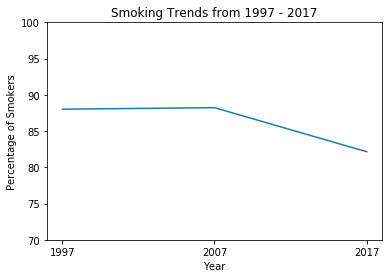

In [55]:
x_axis = ['1997', '2007', '2017']
y_axis = [percentage_1997, percentage_2007, percentage_2017]

plt.plot(x_axis, y_axis)
plt.xlabel("Year")
plt.ylabel("Percentage of Smokers")
plt.title("Smoking Trends from 1997 - 2017")
plt.ylim([70, 100])

plt.savefig('Output/Smoking Trends from 1997 - 2017.png')
plt.show()

### Trend Analysis over years (2007, 2017) for 100% fruit juice consumed
#### Note:  1997 was not used due to lack of data (non answer of question)

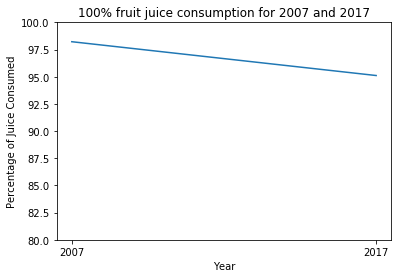

In [56]:
percentage_juice_2007 = round(sum(sum_2007['100% fruit juice 7 days'])/count_2007 * 100,2)
percentage_juice_2017 = round(sum(sum_2017['100% fruit juice 7 days'])/count_2017 * 100,2)
x_axis = ['2007', '2017']
y_axis = [percentage_juice_2007, percentage_juice_2017]

plt.plot(x_axis, y_axis)
plt.xlabel("Year")
plt.ylabel("Percentage of Juice Consumed")
plt.title("100% fruit juice consumption for 2007 and 2017")
plt.ylim([80, 100])

plt.savefig('Output/100% fruit juice consumption for 2007 and 2017.png')
plt.show()

##### Based on the charts created with Matplotlib we observed that, we were proceeding incorrectly, with our analysis. 

In [ ]:
# x_axis1 = ["Underweight", "Normal", "Overweight", "Obese"]
# y_axis1 = [(round(juice_bmi[3]/totl*100,2)), (round(juice_bmi[0]/totl*100,2)), round(juice_bmi[2]/totl*100,2),
#          (round(juice_bmi[1]/totl*100,2))]
# plt.bar(x_axis, y_axis)
# plt.xlabel("BMI Range")
# plt.ylabel("Percentage of Sugar Drink Consumption")
# plt.title("2017 BMI vs. Sugary Drink Consumption")
# # plt.ylim([80, 100])

# plt.savefig('Output/2017 BMI vs. Sugary Drink Consumption.png')
# plt.show()

In [83]:
# smoker_bmi = Data_2017.groupby(["BMI Range"])["cigar smoke?"].count()
# total = sum(juice_bmi)
# x_axis2 = ["Underweight", "Normal", "Overweight", "Obese"]
# y_axis2 = [(round(smoker_bmi[3]/total*100,2)), (round(smoker_bmi[0]/total*100,2)), round(smoker_bmi[2]/total*100,2),
#          (round(smoker_bmi[1]/total*100,2))]
# plt.bar(x_axis, y_axis)
# plt.xlabel("BMI Range")
# plt.ylabel("Percentage of Smoking")
# plt.title("2017 BMI vs. Smoking")
# plt.ylim([0, 60])

# plt.savefig('Output/2017 BMI vs. Smoking.png')
# plt.show

In [84]:
# vape_bmi = Data_2017.groupby(["BMI Range"])["vape?"].count()
# totals = sum(vape_bmi)
# x_axis2 = ["Underweight", "Normal", "Overweight", "Obese"]
# y_axis2 = [(round(vape_bmi[3]/totals*100,2)), (round(vape_bmi[0]/totals*100,2)), round(vape_bmi[2]/totals*100,2),
#          (round(vape_bmi[1]/totals*100,2))]
# plt.bar(x_axis, y_axis)
# plt.xlabel("BMI Range")
# plt.ylabel("Percentage of Vaping")
# plt.title("2017 BMI vs. Vaping")
# plt.ylim([0, 60])

# plt.savefig('Output/2017 BMI vs. Vaping.png')
# plt.show()

In [85]:
# other_bmi = Data_2017.groupby(["BMI Range"])["other tobacco?"].count()
# ttl = sum(vape_bmi)
# x_axis2 = ["Underweight", "Normal", "Overweight", "Obese"]
# y_axis2 = [(round(other_bmi[3]/ttl*100,2)), (round(other_bmi[0]/ttl*100,2)), round(other_bmi[2]/ttl*100,2),
#          (round(other_bmi[1]/ttl*100,2))]
# plt.bar(x_axis, y_axis)
# plt.xlabel("BMI Range")
# plt.ylabel("Percentage of Other smoked products")
# plt.title("2017 BMI vs. Other smoked products")
# plt.ylim([0, 60])

# plt.savefig('Output/2017 BMI vs. Other smoked products.png')
# plt.show()

## Individual Year Analysis

### Year 2017

In [57]:
juice_bmi = pd.DataFrame(Data_2017.groupby(["BMI Range"])["100% fruit juice 7 days"].count())
juice_bmi = juice_bmi.rename(columns={'100% fruit juice 7 days' : 'juice_yes'})

juice_total = pd.DataFrame(Data_2017.groupby(["BMI Range"])["BMI Range"].count())
juice_total = juice_total.rename(columns={'BMI Range' : 'juice_total'})

juice_df = pd.merge(juice_bmi, juice_total, on = "BMI Range")

juice_df["juice_no"] = juice_df["juice_total"] - juice_df["juice_yes"]

juice_df["juice_yes_per"] = round(juice_df["juice_yes"]/juice_df["juice_total"]*100,2)

juice_df["juice_no_per"] = round(juice_df["juice_no"]/juice_df["juice_total"]*100,2)

juice_df.reset_index(inplace = True)

juice_df

,BMI Range,juice_yes,juice_total,juice_no,juice_yes_per,juice_no_per
0,Normal,55538,58208,2670,95.41,4.59
1,Obese,11066,11734,668,94.31,5.69
2,Overweight,16366,17275,909,94.74,5.26
3,Underweight,9988,10524,536,94.91,5.09


In [76]:
BMI = juice_df["BMI Range"].to_list()
fig = go.Figure(data=[
    go.Bar(name='Yes', x=BMI, y=juice_df["juice_yes_per"].to_list()),
    go.Bar(name='No', x=BMI, y=juice_df["juice_no_per"].to_list())
    
])


# # Change the bar mode
fig.update_layout(barmode = 'stack', xaxis_type='category',
                 title_text = 'BMI Range v/s Percentage consumption of juices for 2017')

pio.renderers.default = "browser"
# # plt.savefig('Output/100% fruit juice consumption for 2007 and 2017.png') 
# # fig.write_image("Output/100% fruit juice consumption for 2007 and 2017.png")
pio.show(fig)


In [60]:
smoke_bmi = pd.DataFrame(Data_2017.groupby(["BMI Range"])["cigar smoke?"].count())
smoke_bmi = smoke_bmi.rename(columns={'cigar smoke?' : 'smoke_yes'})

smoke_total = pd.DataFrame(Data_2017.groupby(["BMI Range"])["BMI Range"].count())
smoke_total = smoke_total.rename(columns={'BMI Range' : 'smoke_total'})

smoke_df = pd.merge(smoke_bmi, smoke_total, on = "BMI Range")

smoke_df["smoke_no"] = smoke_df["smoke_total"] - smoke_df["smoke_yes"]

smoke_df["smoke_yes_per"] = round(smoke_df["smoke_yes"]/smoke_df["smoke_total"]*100,2)

smoke_df["smoke_no_per"] = round(smoke_df["smoke_no"]/smoke_df["smoke_total"]*100,2)

smoke_df.reset_index(inplace = True)

smoke_df

,BMI Range,smoke_yes,smoke_total,smoke_no,smoke_yes_per,smoke_no_per
0,Normal,47999,58208,10209,82.46,17.54
1,Obese,9714,11734,2020,82.79,17.21
2,Overweight,14302,17275,2973,82.79,17.21
3,Underweight,8283,10524,2241,78.71,21.29


In [77]:
BMI = smoke_df["BMI Range"].to_list()
fig = go.Figure(data=[
    go.Bar(name='Yes', x=BMI, y=smoke_df["smoke_yes_per"].to_list()),
    go.Bar(name='No', x=BMI, y=smoke_df["smoke_no_per"].to_list())
    
])


# # Change the bar mode
fig.update_layout(barmode = 'stack', xaxis_type='category',
                 title_text = 'BMI Range v/s Percentage consumption of smoke for 2017')

pio.renderers.default = "browser"
# # plt.savefig('Output/100% fruit juice consumption for 2007 and 2017.png') 
# # fig.write_image("Output/100% fruit juice consumption for 2007 and 2017.png")
pio.show(fig)

In [64]:
vape_bmi = pd.DataFrame(Data_2017.groupby(["BMI Range"])["vape?"].count())
vape_bmi = vape_bmi.rename(columns={'vape?' : 'vape_yes'})

vape_total = pd.DataFrame(Data_2017.groupby(["BMI Range"])["BMI Range"].count())
vape_total = vape_total.rename(columns={'BMI Range' : 'vape_total'})

vape_df = pd.merge(vape_bmi, vape_total, on = "BMI Range")

vape_df["vape_no"] = vape_df["vape_total"] - vape_df["vape_yes"]

vape_df["vape_yes_per"] = round(vape_df["vape_yes"]/vape_df["vape_total"]*100,2)

vape_df["vape_no_per"] = round(vape_df["vape_no"]/vape_df["vape_total"]*100,2)

vape_df.reset_index(inplace = True)

vape_df

,BMI Range,vape_yes,vape_total,vape_no,vape_yes_per,vape_no_per
0,Normal,43371,58208,14837,74.51,25.49
1,Obese,8853,11734,2881,75.45,24.55
2,Overweight,12974,17275,4301,75.10,24.90
3,Underweight,7323,10524,3201,69.58,30.42


In [78]:
BMI = vape_df["BMI Range"].to_list()
fig = go.Figure(data=[
    go.Bar(name='Yes', x=BMI, y=vape_df["vape_yes_per"].to_list()),
    go.Bar(name='No', x=BMI, y=vape_df["vape_no_per"].to_list())
    
])


# # Change the bar mode
fig.update_layout(barmode = 'stack', xaxis_type='category',
                 title_text = 'BMI Range v/s Percentage consumption of vape for 2017')

pio.renderers.default = "browser"
# # plt.savefig('Output/100% fruit juice consumption for 2007 and 2017.png') 
# # fig.write_image("Output/100% fruit juice consumption for 2007 and 2017.png")
pio.show(fig)

In [67]:
other_bmi = pd.DataFrame(Data_2017.groupby(["BMI Range"])["other tobacco?"].count())
other_bmi = other_bmi.rename(columns={'other tobacco?' : 'other_yes'})

other_total = pd.DataFrame(Data_2017.groupby(["BMI Range"])["BMI Range"].count())
other_total = other_total.rename(columns={'BMI Range' : 'other_total'})

other_df = pd.merge(other_bmi, other_total, on = "BMI Range")

other_df["other_no"] = other_df["other_total"] - other_df["other_yes"]

other_df["other_yes_per"] = round(other_df["other_yes"]/other_df["other_total"]*100,2)

other_df["other_no_per"] = round(other_df["other_no"]/other_df["other_total"]*100,2)

other_df.reset_index(inplace = True)

other_df

,BMI Range,other_yes,other_total,other_no,other_yes_per,other_no_per
0,Normal,42327,58208,15881,72.72,27.28
1,Obese,8727,11734,3007,74.37,25.63
2,Overweight,12840,17275,4435,74.33,25.67
3,Underweight,7383,10524,3141,70.15,29.85


In [79]:
BMI = other_df["BMI Range"].to_list()
fig = go.Figure(data=[
    go.Bar(name='Yes', x=BMI, y=other_df["other_yes_per"].to_list()),
    go.Bar(name='No', x=BMI, y=other_df["other_no_per"].to_list())
    
])


# # Change the bar mode
fig.update_layout(barmode = 'stack', xaxis_type='category',
                 title_text = 'BMI Range v/s Percentage consumption of other Tobacco for 2017')

pio.renderers.default = "browser"
# # plt.savefig('Output/100% fruit juice consumption for 2007 and 2017.png') 
# # fig.write_image("Output/100% fruit juice consumption for 2007 and 2017.png")
pio.show(fig)

### Year 2007

In [70]:
juice_bmi_2007 = pd.DataFrame(Data_2007.groupby(["BMI Range"])["100% fruit juice 7 days"].count())
juice_bmi_2007 = juice_bmi_2007.rename(columns={'100% fruit juice 7 days' : 'juice_yes'})

juice_total_2007 = pd.DataFrame(Data_2007.groupby(["BMI Range"])["BMI Range"].count())
juice_total_2007 = juice_total_2007.rename(columns={'BMI Range' : 'juice_total'})

juice_df_2007 = pd.merge(juice_bmi_2007, juice_total_2007, on = "BMI Range")

juice_df_2007["juice_no"] = juice_df_2007["juice_total"] - juice_df_2007["juice_yes"]

juice_df_2007["juice_yes_per"] = round(juice_df_2007["juice_yes"]/juice_df_2007["juice_total"]*100,2)

juice_df_2007["juice_no_per"] = round(juice_df_2007["juice_no"]/juice_df_2007["juice_total"]*100,2)

juice_df_2007.reset_index(inplace = True)

juice_df_2007

,BMI Range,juice_yes,juice_total,juice_no,juice_yes_per,juice_no_per
0,Normal,21852,22204,352,98.41,1.59
1,Obese,3678,3767,89,97.64,2.36
2,Overweight,5985,6120,135,97.79,2.21
3,Underweight,3378,3436,58,98.31,1.69


In [80]:
BMI_2007 = juice_df_2007["BMI Range"].to_list()
fig = go.Figure(data=[
    go.Bar(name='Yes', x=BMI_2007, y=juice_df_2007["juice_yes_per"].to_list()),
    go.Bar(name='No', x=BMI_2007, y=juice_df_2007["juice_no_per"].to_list())
    
])


# # Change the bar mode
fig.update_layout(barmode = 'stack', xaxis_type='category',
                 title_text = 'BMI Range v/s Percentage consumption of juicesfor 2007')

pio.renderers.default = "browser"
# # plt.savefig('Output/100% fruit juice consumption for 2007 and 2017.png') 
# # fig.write_image("Output/100% fruit juice consumption for 2007 and 2017.png")
pio.show(fig)


In [72]:
smoke_bmi_2007 = pd.DataFrame(Data_2007.groupby(["BMI Range"])["cigar smoke?"].count())
smoke_bmi_2007 = smoke_bmi_2007.rename(columns={'cigar smoke?' : 'smoke_yes'})

smoke_total_2007 = pd.DataFrame(Data_2007.groupby(["BMI Range"])["BMI Range"].count())
smoke_total_2007 = smoke_total_2007.rename(columns={'BMI Range' : 'smoke_total'})

smoke_df_2007 = pd.merge(smoke_bmi_2007, smoke_total_2007, on = "BMI Range")

smoke_df_2007["smoke_no"] = smoke_df_2007["smoke_total"] - smoke_df_2007["smoke_yes"]

smoke_df_2007["smoke_yes_per"] = round(smoke_df_2007["smoke_yes"]/smoke_df_2007["smoke_total"]*100,2)

smoke_df_2007["smoke_no_per"] = round(smoke_df_2007["smoke_no"]/smoke_df_2007["smoke_total"]*100,2)

smoke_df_2007.reset_index(inplace = True)

smoke_df_2007

,BMI Range,smoke_yes,smoke_total,smoke_no,smoke_yes_per,smoke_no_per
0,Normal,19662,22204,2542,88.55,11.45
1,Obese,3322,3767,445,88.19,11.81
2,Overweight,5414,6120,706,88.46,11.54
3,Underweight,2946,3436,490,85.74,14.26


In [81]:
BMI_2007 = smoke_df["BMI Range"].to_list()
fig = go.Figure(data=[
    go.Bar(name='Yes', x=BMI_2007, y=smoke_df_2007["smoke_yes_per"].to_list()),
    go.Bar(name='No', x=BMI_2007, y=smoke_df_2007["smoke_no_per"].to_list())
    
])


# # Change the bar mode
fig.update_layout(barmode = 'stack', xaxis_type='category',
                 title_text = 'BMI Range v/s Percentage consumption of smoke for 2007')

pio.renderers.default = "browser"
# # plt.savefig('Output/100% fruit juice consumption for 2007 and 2017.png') 
# # fig.write_image("Output/100% fruit juice consumption for 2007 and 2017.png")
pio.show(fig)